# Exploration template jupyter notebook - draft

This notebook is a generic template for the data notebooks repository. Use this template as a starting point so that as the notebook library grows, there is consistency in formatting as well as the inclusion of required core packages, parameters and tags.
PLease refer to the README.md for more information and a more detailed breakdown of ths templates.

## Exploration templates

Execution templates can be used for developing new data products, testing, experimenting and iteration. These are also the notebooks that should be used to visualise results before developing an execution notebook.

# Title
put something here about naming convention for data notebooks. Include examples.

example copied from another notebook:

_author's initials_progressive number_title.ipynb_

For example:

_EF_01_Data Exploration.ipynb_


## Purpose
State the purpose of the notebook

## Methodology
Quickly describe assumptions and processing steps.

## WIP - Improvements
Use this section only if the notebook is not final.

Notable TODOs:

- todo 1;
- todo 2;
- todo 3.

## Expected Output

## Suggested next steps
State suggested next steps, based on results from this notebook (this is more for data science than generic template)


# Setup
## Library import

### Install packages

For exploration notebooks, do not add new python packages to the requirements.txt files. Instead, you can install them locally in the first cell of the notebook. This lets you explore and test new packages quickly without needing to rebuild the dev container. Once you know a package will be needed for a notebook that is going into production, you should add the packages to the GIS base image.


### Important note about papermill:

You don't need to add papermill descriptions and cell tags when you are doing exploratory work, but the are needed for any notebooks being put into production (see the `template-execution.ipynb` file for examples).



In [1]:
# Install packages needed for this notebook that are not part of the core dev container pip list

%pip install jupyter_bokeh -q
%pip install dask-expr -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Once installed, import your packages

# Core packages
import json
import os
from io import StringIO

# Data manipulation
import numpy as np
import pandas as pd

# Geospatial
import geopandas as gpd
import rasterio
import pystac_client
import rioxarray
from gis_utils.stac import initialize_stac_client, query_stac_api
from geodata_fetch import settingshandler, harvest

# Visualisations in notebook
from IPython.display import display, JSON
import holoviews as hv
import geoviews as gv
import panel as pn

# Exporting data
import boto3
from aws_utils import S3Utils

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
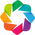

In [3]:
# Set environment variable for AWS public datasets

# this is a GDAL flag, it does not impact AWS access.  Used for accessing public buckets, which we do for some AWS earth data repositories
os.environ['AWS_NO_SIGN_REQUEST'] = 'YES'

# some of the visualisation packages we use need to be configured. Here, Holoviews is being set to use the 'bokeh' version.
hv.extension('bokeh')

## Parameter definition and tags

## Functions

In [4]:
def get_bbox_from_geodf(geojson_data):
    """
    Extract the bounding box from a GeoJSON-like dictionary.
    
    Parameters:
    - geojson_data (dict): The GeoJSON data as a Python dictionary.
    
    Returns:
    - A list representing the bounding box [min_lon, min_lat, max_lon, max_lat].
    """
    gdf = gpd.GeoDataFrame.from_features(geojson_data["features"])
    bbox = list(gdf.total_bounds)
    return bbox

In [5]:
def compute_elevation_statistics(dem_data):
    """
    Compute basic elevation statistics from a digital elevation model (DEM) dataset.

    This function calculates the minimum, maximum, mean, and standard deviation of elevation
    values within the provided DEM data array. It handles the DEM data as a NumPy array,
    which is a common format for raster data in Python.

    Parameters:
    - dem_data (numpy.ndarray): A 2D NumPy array containing elevation data from a DEM raster.
      The array should contain numeric values representing elevation at each cell. No-data
      values should be represented by NaNs in the array to be properly ignored in calculations.

    Returns:
    - dict: A dictionary containing the computed elevation statistics, with keys 'min_elevation',
      'max_elevation', 'mean_elevation', and 'std_dev_elevation'.
    """

    # Compute the minimum elevation, ignoring any NaN values which represent no-data cells
    min_elevation = float(np.nanmin(dem_data))

    # Compute the maximum elevation, ignoring any NaN values
    max_elevation = float(np.nanmax(dem_data))

    # Compute the mean elevation, ignoring any NaN values
    mean_elevation = float(np.nanmean(dem_data))

    # Compute the standard deviation of elevation, ignoring any NaN values
    std_dev_elevation = float(np.nanstd(dem_data))

    # Construct and return a dictionary containing the computed statistics
    stats = {
        'min_elevation': min_elevation,
        'max_elevation': max_elevation,
        'mean_elevation': mean_elevation,
        'std_dev_elevation': std_dev_elevation
    }

    return stats

In [6]:
#papermill_description=custom functions

def list_tif_files(path):
    return [f for f in os.listdir(path) if f.endswith('cm.tif')]

# Function to load and display the selected .tif file
def load_and_display_tif(filename):
    filepath = os.path.join(path_settings, filename)
    img = gv.util.from_xarray(rioxarray.open_rasterio(filepath).rio.reproject('EPSG:3857'))
    
    # Define map tiles and create the map image
    map_tiles = gv.tile_sources.EsriImagery().opts(width=1000, height=600)
    map_img = gv.Image(img, kdims=['x', 'y']).opts(cmap='viridis', title=filename)
    map_combo = map_tiles * map_img
    
    return map_combo

## Data import

In [7]:
#papermill_description=

# paths for input and output directories.
input_dir = '/workspace/notebooks/sandbox/data/input-data'
output_dir = '/workspace/notebooks/sandbox/data/output-data'

# Path for the input geojson file. This file will then be imported as a geodataframe
input_geojson_filename = 'dissolved-boundaries.geojson'
input_geom = os.path.join(input_dir, input_geojson_filename)

# filename for the getdata harvester settings that will be generated from parameters.
geodata_params_fname = 'settings_showcase.json'
geodata_params = os.path.join(output_dir,geodata_params_fname)


property_name = "test_farm"
notebook_key = "localjupyter"


# Import the chosen geometry file as a geodataframe
geom = gpd.read_file(input_geom)

## Data processing

In [8]:
#papermill_description=parameters

# Setting parameters to create the settings.json file

# Column names for latitude and longitude in input file:
colname_lat = geom.centroid.y[0]
colname_lng = geom.centroid.x[0]

# Bounding box: Left (min Long), Bottom (min Lat), Right (max Long), Top (max Lat)
target_bbox = list(geom.total_bounds)
# Resolution of data download in arcseconds (1 arcsec ~ 30m)
target_res = 3

date_start = "2022-10-01"
date_end = "2022-11-30"
# Number of time intervals to split the image collection into
time_intervals = 0

# This example is only selecting one target source. See other example notebooks for more complicated examples of fetching multiple data sources
target_sources = {"DEM":"DEM"}

/tmp/ipykernel_21416/4266985659.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colname_lat = geom.centroid.y[0]
/tmp/ipykernel_21416/4266985659.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colname_lng = geom.centroid.x[0]


In [9]:
json_data = {
    "infile": property_name,
    "outpath": output_dir,
    "target_centroid_lat": colname_lat,
    "target_centroid_lng": colname_lng,
    "target_bbox": target_bbox,
    "target_res": str(target_res),
    "date_start": date_start if date_start is not None else "2022-10-01", #a date of some kind must be provided or the harvester complains
    "date_end": date_end if date_end is not None else "2022-11-30",
    "time_intervals": time_intervals,
    "target_sources": target_sources
}

In [10]:
#write out the parameters as a json file. This can be replaced with an API call at a later date.

with open(geodata_params, "w", encoding='utf-8') as file:
    json.dump(json_data, file, ensure_ascii=False, indent=4)

In [11]:
settingshandler.display_settings(geodata_params)

{
    "date_end": "2022-11-30",
    "date_start": "2022-10-01",
    "infile": "test_farm",
    "outpath": "/workspace/notebooks/sandbox/data/output-data",
    "target_bbox": [
        116.26012130269045,
        -29.307384715430175,
        116.3875862387774,
        -29.220237788279107
    ],
    "target_centroid_lat": -29.263026061552612,
    "target_centroid_lng": 116.32813629361138,
    "target_res": "3",
    "target_sources": {
        "DEM": "DEM"
    },
    "time_intervals": 0
}


In [12]:
# store settings as namespace (easier to interact with)
settings = settingshandler.main(geodata_params)

In [13]:
df = harvest.run(geodata_params)

Starting the data harvester -----
Found the following 1 sources: ['DEM']

Retrieving coverage from WCS server 0.3s                                        
DEM_SRTM_1_Second_Hydro_Enforced.tif already exists, skipping download

Harvest complete


## Data Visualisation and export

In [14]:
# Construct the filenames using propertyName
elevation_json_filename = f"dem_{property_name}_elevation_stats.json"

#output tif name hardcoded for now but will be dynamically read later
output_tiff_filename = 'DEM_SRTM_1_Second_Hydro_Enforced.tif'

In [15]:
# Load AWS credentials from environment variables
aws_access_key_id = os.getenv('AWS_ACCESS_KEY_ID')
aws_secret_access_key = os.getenv('AWS_SECRET_ACCESS_KEY')
aws_default_region = 'us-east-1'
bucket_name = 'jenna-remote-sensing-sandbox'

s3_client = S3Utils(
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name=aws_default_region,
    s3_bucket='jenna-remote-sensing-sandbox',
    prefix=notebook_key
)   

Read in the collected DEM and comput some statistics on it

In [16]:
# Use visualisation to check the input file is correct
dem_tiff_dir = os.path.join(output_dir, output_tiff_filename)
data = rioxarray.open_rasterio(dem_tiff_dir)


In [17]:
elevation_stats = compute_elevation_statistics(data)

# Serialize 'elevation_stats' to a JSON string
elevation_stats_json = json.dumps(elevation_stats)
# Convert the JSON string to bytes
elevation_stats_bytes = elevation_stats_json.encode()

# print elevation stats as a check:
elevation_stats

{'min_elevation': 269.5164794921875,
 'max_elevation': 410.23663330078125,
 'mean_elevation': 312.4820556640625,
 'std_dev_elevation': 19.533472061157227}

In [18]:
img = gv.util.from_xarray(rioxarray.open_rasterio(dem_tiff_dir).rio.reproject('EPSG:3857'))
map_tiles = hv.element.tiles.EsriImagery().opts(width=1000, height=600)
map_img = hv.Image(img, kdims=['x','y']).opts(cmap='viridis')
map_combo = map_tiles * map_img
map_combo

:Overlay
   .Tiles.I :Tiles   [x,y]
   .Image.I :Image   [x,y]   (z)

Save to AWS S3 bucket

In [20]:

s3_client.upload_file(file_path=dem_tiff_dir, file_name=output_tiff_filename)

NoCredentialsError: Unable to locate credentials